In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

%autoreload


In [3]:
day3 = pd.read_csv('logs\day3.csv', low_memory=False)
day3.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1690418005880,973,Token_TnT,200,OK,Tokens 1-1,text,True,NaN,261,425,1,1,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,968,0,861
1,1690418006252,318,Token Request,200,OK,Tokens 1-1,text,True,NaN,3002,507,1,1,https://idcs-067d961402b24114844819b5e21e493d....,317,0,92
2,1690418006508,178,TnT_Base,200,OK,TnT 4-1,text,True,NaN,2285,370,1,6,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,178,0,73
3,1690418008627,2279,WG_Base,202,Accepted,WG 6-1,text,True,NaN,388,3788,1,14,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,2279,0,161
4,1690418009209,2861,SalesOrder_Base,201,Created,SalesOrder 3-1,text,True,NaN,440,4746,1,14,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,2861,0,55


In [4]:
day3_test = Test(day3, 180, False, True)

In [10]:
day3_test.unique_labels

array(['Token_TnT', 'Token Request', 'TnT_Base', 'WG_Base',
       'SalesOrder_Base', 'RTSA_Base', 'QSL_Base', 'RTSA_20th',
       'RTSA_40th', 'WG_100', 'WG_200', 'SalesOrder_400',
       'SalesOrder_800', 'SalesOrder_1450', 'TnT_7Th'], dtype=object)

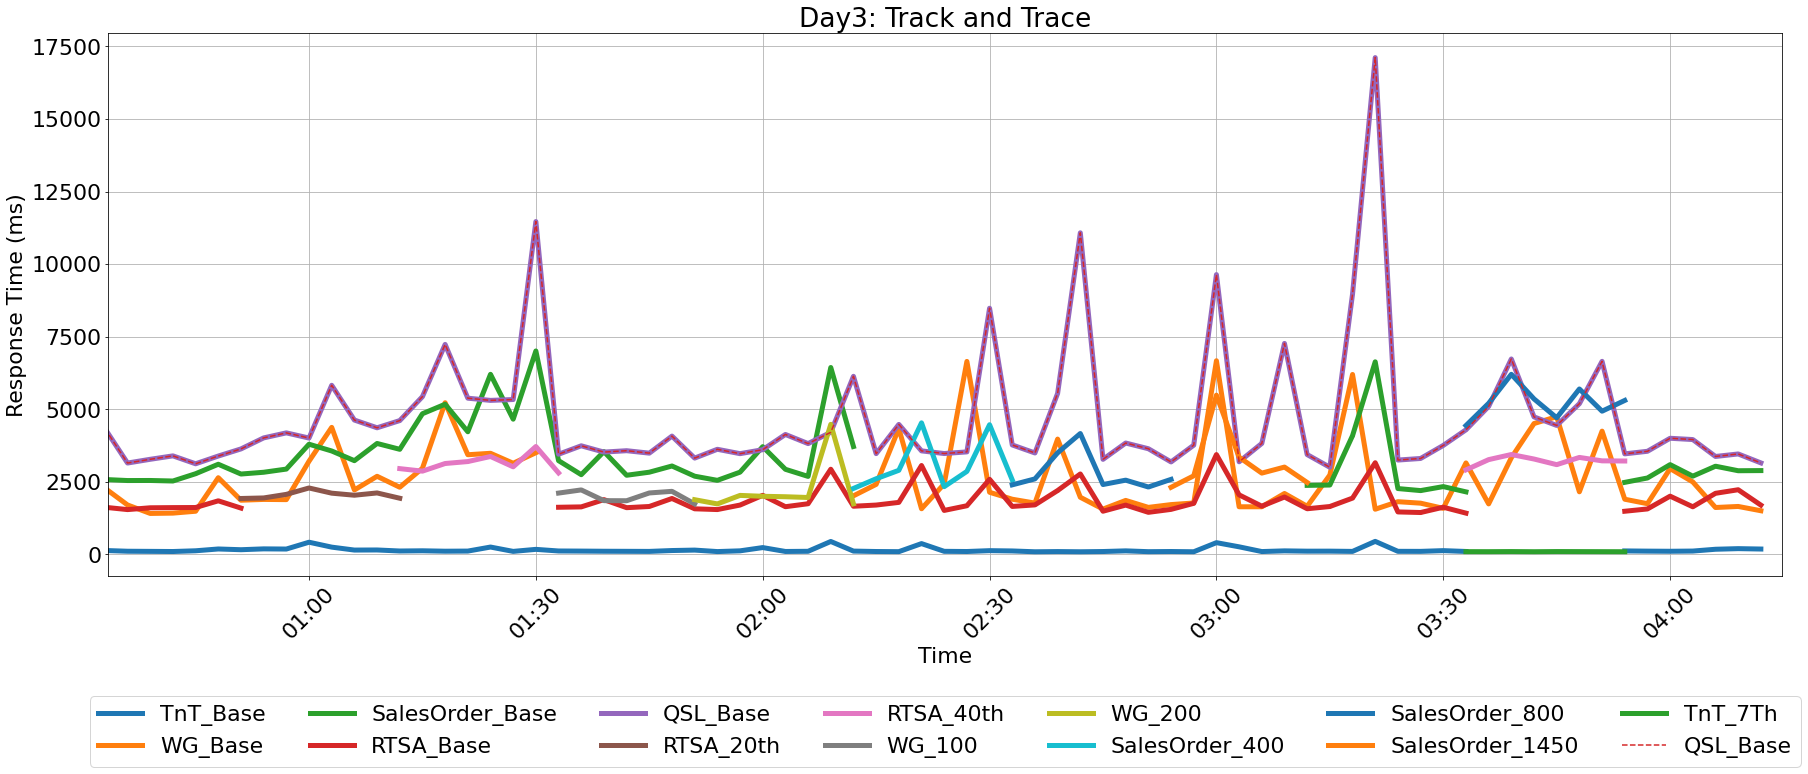

In [14]:
day3_test.time_series_by_categories(['TnT', 'RTSA', 'SalesOrder', 'WG', 'QSL'], ['QSL'], 'Day3: Track and Trace', 'avg_res')

In [20]:
day3_test.export_summary_metrics_by_segment('day3_seg_stats.csv')

Segment: 0
Segment: 1
Segment: 2
Segment: 3
Segment: 4
Segment: 5
Segment: 6
Segment: 7
Segment: 8
Segment: 9
Segment: 10


In [21]:

day3_test.get_avg_res_by_label('SalesOrder_Base', 'RTSA_40th')

5335.08

In [5]:
B = ["RTSA_Base", 'RTSA_20th', 'RTSA_40th']
A = ['SalesOrder_Base', 'QSL_Base', 'WG_Base', 'TnT_Base']


for a in A:
    for b in B:
        print(f'{a} {b} {day3_test.get_avg_res_by_label(a, b)}')

SalesOrder_Base RTSA_Base 2508.8
SalesOrder_Base RTSA_20th 2980.5
SalesOrder_Base RTSA_40th 4372.5
QSL_Base RTSA_Base 3550.25
QSL_Base RTSA_20th 4235.0
QSL_Base RTSA_40th 5166.75
WG_Base RTSA_Base 1833.6666666666667
WG_Base RTSA_20th 2217.0
WG_Base RTSA_40th 3379.0
TnT_Base RTSA_Base 97.5
TnT_Base RTSA_20th 125.0
TnT_Base RTSA_40th 95.0
